In [18]:
%load_ext autoreload
%autoreload 2
import feature_extract
import sys
sys.path.append("..")
import torch
import psql_methods as psql
import pickle
import alchemy_methods as alc
from tqdm import tqdm
import numpy as np
import image_utils as imgs
import Openseas_Methods as opse
import multiprocessing
import pandas as pd
import feature_utils as feat
import matplotlib.pyplot as plt
import counterfeit_utils as cfu

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
der_lists = cfu.der_list_from_db()
columns = ['slug','derivative']
df1 = pd.DataFrame(der_lists,columns=columns)
cf_nums = cfu.get_counterfeit_db(slug=None,db_name='objective_cf_num')
columns = ['slug','cf_num']
df2 = pd.DataFrame(cf_nums,columns=columns)
merged_df = pd.merge(df1,df2, how='right',on='slug').query("cf_num>=5")


In [38]:
grouped = merged_df.groupby('slug')
percentiles_total = []
percentiles_tokens = []
for slug,group in grouped:
    print(slug)
    ders = group['derivative'].to_list()
    print(ders)
    percentiles_total.append((slug,cfu.compute_overlap_cdf(slug,der_list = ders,xlim=100,ylim=0.04,show=False,filter='')))
    percentiles_tokens.append((slug,cfu.compute_overlap_cdf(slug,der_list = ders,xlim=100,ylim=0.04,show=False,filter='one_token')))
# plt.savefig('small_scale_cdf_plot.png')

0n1-force
['0n1-comics', '0n1-frame']
count    382395.000000
mean       4943.134408
std        3132.426148
min           1.000000
0.1%         16.000000
0.2%         16.000000
1%           67.000000
10%         737.000000
25%        2191.000000
50%        4703.000000
75%        7580.000000
max       10976.000000
dtype: float64
count    98386.000000
mean      5443.011465
std       3225.434427
min          1.000000
0.1%         9.000000
0.2%        16.000000
1%          79.000000
10%        973.000000
25%       2569.000000
50%       5502.000000
75%       8301.000000
max      10976.000000
dtype: float64
3landers
['']
count    1.413777e+06
mean     5.982562e+03
std      2.930274e+03
min      1.000000e+00
0.1%     1.700000e+01
0.2%     3.400000e+01
1%       1.360000e+02
10%      1.326000e+03
25%      3.802000e+03
50%      6.571000e+03
75%      8.327000e+03
max      1.097600e+04
dtype: float64
count    162027.000000
mean       4994.569282
std        3231.277425
min           1.000000
0.1%   

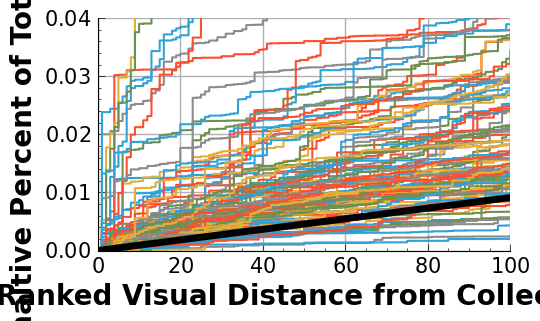

In [39]:
percentiles_total
plt.show()

In [40]:
with_nums_total = sorted([(x[0],x[1],cfu.get_counterfeit_db(slug=x[0],db_name='objective_cf_num')[0][0]) for x in percentiles_total])
with_nums_tokens = sorted([(x[0],x[1],cfu.get_counterfeit_db(slug=x[0],db_name='objective_cf_num')[0][0]) for x in percentiles_tokens])
# totals = [(x[0],((x[1] < x[2]).sum())/len(x[1])) for x in with_nums]
avgs_total = [(x[0],((x[1] < x[2]).sum())/len(x[1]),(x[2]/10976)) for x in with_nums_total]
avgs_tokens = [(x[0],((x[1] < x[2]).sum())/len(x[1]),(x[2]/10976)) for x in with_nums_tokens]
df_1 = pd.DataFrame(avgs_total,columns=['Collection','% Knockoffs','Expected % Knockoffs'])
df_1['percentage'] = df_1['% Knockoffs']/df_1['Expected % Knockoffs']

df_2 = pd.DataFrame(avgs_tokens,columns=['Collection','% Knockoffs','Expected % Knockoffs'])
df_2['percentage'] = df_2['% Knockoffs']/df_2['Expected % Knockoffs']
# result_df.set_index('index', inplace=True)
# display(result_df)
# # result_df.sort_values('')
# result_df = result_df.transpose()
print(df_1['percentage'].mean())
print(df_2['percentage'].mean())
df_1.set_index('Collection', inplace=True)
df_2.set_index('Collection', inplace=True)
latex_code = df_1.to_latex()
# Print the LaTeX code
print(latex_code)
latex_code = df_2.to_latex()
# Print the LaTeX code
print(latex_code)

4.607761438678495
4.840712053766225
\begin{tabular}{lrrr}
\toprule
 & % Knockoffs & Expected % Knockoffs & percentage \\
Collection &  &  &  \\
\midrule
0n1-force & 0.000907 & 0.001276 & 0.711432 \\
3landers & 0.004396 & 0.005284 & 0.831910 \\
alienfrensnft & 0.038777 & 0.003371 & 11.503145 \\
azuki & 0.023873 & 0.009020 & 2.646760 \\
beanzofficial & 0.001584 & 0.001276 & 1.242140 \\
bears-deluxe & 0.000226 & 0.000456 & 0.495215 \\
boredapeyachtclub & 0.008053 & 0.008382 & 0.960726 \\
chain-runners-nft & 0.004141 & 0.000911 & 4.545495 \\
clonex & 0.002951 & 0.001913 & 1.542495 \\
cool-cats-nft & 0.018162 & 0.006104 & 2.975234 \\
coolmans-universe & 0.006712 & 0.001913 & 3.508056 \\
cryptodickbutts-s3 & 0.005969 & 0.002915 & 2.047206 \\
cryptopunks & 0.002227 & 0.006560 & 0.339506 \\
degentoonz-collection & 0.004874 & 0.000820 & 5.943732 \\
doodles-official & 0.015438 & 0.008109 & 1.903900 \\
forgottenruneswizardscult & 0.012241 & 0.000456 & 26.871176 \\
genuine-undead & 0.003843 & 0.00

In [230]:
with_nums_total = sorted([(x[0],x[1],cfu.get_counterfeit_db(x[0])[0][0]) for x in percentiles_total])
with_nums_tokens = sorted([(x[0],x[1],cfu.get_counterfeit_db(x[0])[0][0]) for x in percentiles_tokens])
# totals = [(x[0],((x[1] < x[2]).sum())/len(x[1])) for x in with_nums]
avgs_total = [(x[0],((x[1] < x[2]).sum())/len(x[1]) for x in with_nums_total]
avgs_tokens = [(x[0],((x[1] < x[2]).sum())/len(x[1]) for x in with_nums_tokens]
avgs_total = [(x[0],((x[1] < x[2]).sum())/len(x[1])/(x[2]/10976)) for x in with_nums_total]
avgs_tokens = [(x[0],((x[1] < x[2]).sum())/len(x[1])/(x[2]/10976)) for x in with_nums_tokens]
total_dict = dict(avgs_total)
token_dict = dict(avgs_tokens)
result_df = pd.DataFrame.from_records([token_dict,total_dict])
result_df['index'] = ['Total NFTs','Unique NFTs']
result_df.set_index('index', inplace=True)
display(result_df)
# result_df.sort_values('')
result_df = result_df.transpose()
latex_code = result_df.to_latex()
# Print the LaTeX code
print(latex_code)

,0n1-force,azuki,beanzofficial,boredapeyachtclub,cool-cats-nft,cryptopunks,cyberkongz,doodles-official,fluf,genesis-creepz,...,invisiblefriends,kaiju-kingz,karafuru,mekaverse,mfers,milady,nakamigos,proof-moonbirds,pudgypenguins,world-of-women-nft
index,,,,,,,,,,,,,,,,,,,,,
Total NFTs,1.349883,1.352160,1.182493,0.988743,3.131499,0.566367,0.242115,1.673803,2.023996,1.079041,...,4.859641,2.678233,1.928151,2.320917,4.004518,17.081503,1.468159,0.690557,1.960929,5.147172
Unique NFTs,1.797975,2.379134,1.449163,1.296003,2.775968,0.243008,0.109341,1.544979,1.248797,0.813819,...,4.550894,5.974145,1.713354,1.902906,4.273841,18.327411,2.640671,0.805540,2.382564,4.681447


\begin{tabular}{lrr}
\toprule
index & Total NFTs & Unique NFTs \\
\midrule
0n1-force & 1.349883 & 1.797975 \\
azuki & 1.352160 & 2.379134 \\
beanzofficial & 1.182493 & 1.449163 \\
boredapeyachtclub & 0.988743 & 1.296003 \\
cool-cats-nft & 3.131499 & 2.775968 \\
cryptopunks & 0.566367 & 0.243008 \\
cyberkongz & 0.242115 & 0.109341 \\
doodles-official & 1.673803 & 1.544979 \\
fluf & 2.023996 & 1.248797 \\
genesis-creepz & 1.079041 & 0.813819 \\
goblintownwtf & 1.436148 & 1.954160 \\
hapeprime & 2.661033 & 2.830206 \\
invisiblefriends & 4.859641 & 4.550894 \\
kaiju-kingz & 2.678233 & 5.974145 \\
karafuru & 1.928151 & 1.713354 \\
mekaverse & 2.320917 & 1.902906 \\
mfers & 4.004518 & 4.273841 \\
milady & 17.081503 & 18.327411 \\
nakamigos & 1.468159 & 2.640671 \\
proof-moonbirds & 0.690557 & 0.805540 \\
pudgypenguins & 1.960929 & 2.382564 \\
world-of-women-nft & 5.147172 & 4.681447 \\
\bottomrule
\end{tabular}



In [97]:
slugs = merged_df['slug'].unique()
owner_dates = cfu.get_all_ownershipdates()
owner_dates.rename(columns={'wallet': 'address'}, inplace=True)
counts = []
dead_slugs = ['golbintownwtf','invisiblefriends']
for slug in slugs[:1]:
    slug = 'pudgypenguins'
    overlap = cfu.get_overlaps(slug).drop_duplicates(subset=['slug','address'])
    merged_overlaps = pd.merge(owner_dates,overlap,on=['address','slug'])
    der_list = cfu.der_list_from_db(slug)
    main_dates = owner_dates.query(f"slug=='{slug}'")
    complete_df = pd.merge(main_dates,merged_overlaps,on='address',suffixes=['_orig','']).query("sorted_order<100")
    complete_df = complete_df.query(f'slug not in {der_list}')
    complete_df['timestamp'] = complete_df['timestamp'].astype(int)
    complete_df['timestamp_orig'] = complete_df['timestamp_orig'].astype(int)
    filtered_df = complete_df[complete_df['timestamp'] < complete_df['timestamp_orig']]
    print(slug,len(filtered_df),len(complete_df))
    # display(complete_df)
    if slug not in dead_slugs:
        counts.append((slug,len(filtered_df),len(complete_df)))


pudgypenguins 125 510


In [96]:
averages = [x[1]/(x[2]) for x in counts[:-1] if x[1]!=88]
print(averages)
print(sum(averages)/len(averages))

[0.3333333333333333, 0.41317365269461076, 0.1889763779527559, 0.3580645161290323, 0.21621621621621623, 0.5714285714285714, 0.5063829787234042, 0.21951219512195122, 1.0, 0.5918367346938775, 0.5166163141993958, 0.19047619047619047, 0.22627737226277372, 0.3333333333333333, 0.18319928507596067, 0.44545454545454544, 0.5121951219512195, 0.24509803921568626, 0.7342007434944238, 0.3385093167701863]
0.40621424192637345


In [105]:
filtered_df['slug'].value_counts()

slug
sappy-seals                          108
fortune-friends-club-official-nft      4
foxyfamnft                             4
pudgytown                              2
thealiendoogle                         2
stakedseals                            2
coolpenguinswtf                        1
hushpuppiesnft                         1
pudgy-pandas-official                  1
Name: count, dtype: int64

In [13]:
len(img.get_immediate_subdirectories('expanded_images/val'))

1264

In [73]:
cfu.der_list_to_db('sappy-seals',['stakedseals'])

In [35]:
intervals = cfu.compute_all_intervals('remilio-babies',1,'objective_cf_num')[0]
intervals
top_knocks = []
intervals = sorted(intervals, key=lambda x:x[1],reverse=True)
for interval in intervals:
    print(interval[0])
    top_knocks.append(interval[0])

milady
pixeladymaker
radbro-webring
miladmaker
kawamii
miladycolombia
ghibladymaker
sonoramaker
sadbros95
molady
milady-maker-party
anti-miladies
miladystation
dadbros
sneedmaker
ultraviolence-kibbles
negative-milady
ordinal-miladys
milady-maker-x-sprite
killady
radhoe
bitcoin-miladys
cake-hat-world-order
hurt-hapas
roritamakers1e2
milordmaker-milordia
goulerbros
miladystationclassic
mi1-dy
pepe-maker
neko-maker
conspiracy-lady-maker
pudgy-milady
milaidys
loveposters
slavbro-wee-bring-v2
pixeladymaker-bc
micent-van-gogh


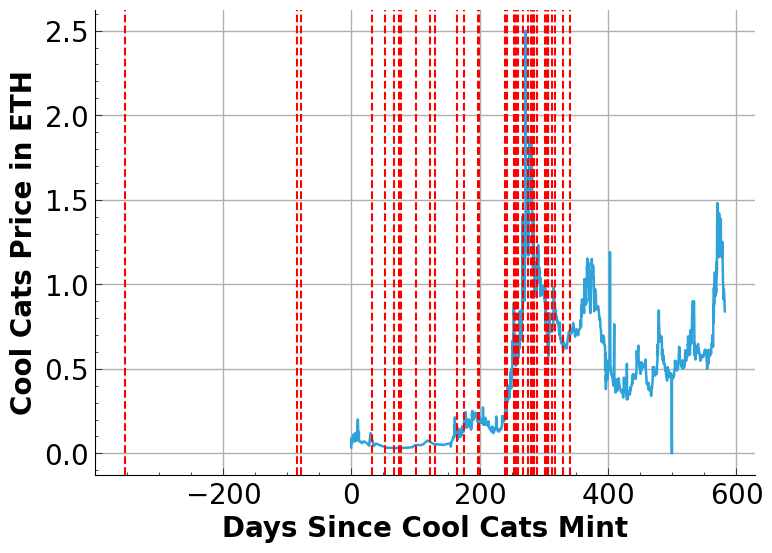

In [36]:
cfu.plot_price_chart_smooth('remilio-babies',top_knocks, 'cool_cats_small_window')